In [ ]:
import sys
!{sys.executable} -m pip install pythainlp
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install attacut

In [24]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.summarize import summarize
import multidict as multidict
import re
import pythainlp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [32]:
text = """
วัคซีน “วาระแห่งชาติ” ของไทย
ปัจจัยสำคัญที่จะทำให้ประเทศไทยเดินหน้าต่อไปได้ ท่ามกลางสถานการณ์โควิดที่ยังไม่มีใครรู้ว่าจะจบลงเมื่อใด นั่นคือ “วัคซีน” ซึ่งรัฐบาลมีแผนจัดหาทั้งในระยะยาวและระยะฉุกเฉิน ที่ผ่านมาเราได้เร่งระดมฉีดวัคซีนให้กับบุคลากรทางการแพทย์ และผู้ที่อยู่ในพื้นที่เสี่ยง รวมทั้งพื้นที่เศรษฐกิจ รวมเกือบ 2 ล้านโดสแล้ว โดยระดมฉีดวันละหลายหมื่นโดส และจากมาตรการจัดหาวัคซีนฉุกเฉินของรัฐบาล เราจึงได้วัคซีนมาเพิ่มในเดือนนี้ อีก 3.5 ล้านโดส และจะได้ความร่วมมือจากภาคเอกชนในการเพิ่มศักยภาพในการฉีดได้อีกมากครับ
ผมขอย้ำว่า รัฐสามารถจัดหาวัคซีนให้กับประชากรในประเทศได้ทุกคนอย่างแน่นอน และจะไม่หยุดการจัดหาและสำรองใช้เพื่อความปลอดภัยของคนไทยทุกคน จากเป้าหมายเดิมของเราที่วางไว้ว่าจะต้องหาให้ได้ 100 ล้านโดส สำหรับประชากร 50 ล้านคน ภายในสิ้นปีนี้ ผมได้สั่งการให้ขยายเป้าหมายเพิ่มเติมออกไปอีกเป็นอย่างน้อย 150 ล้านโดส ซึ่งเราเชื่อมั่นว่าจะจัดหาได้ครบถ้วนอย่างแน่นอน 
ประเทศไทยจะเป็นประเทศเดียวในอาเซียน ที่เป็นศูนย์กลางในการผลิตวัคซีนโควิด-19 ของบริษัทแอสตราเซเนกา ซึ่งผลิตโดยบริษัทสยามไบโอไซเอนซ์ ที่ได้มาตรฐานสูง ผ่านการรับรองคุณภาพจากทั่วโลก โดยบริษัทสยามไบโอไซเอนซ์ จะส่งมอบวัคซีนให้เราได้อย่างน้อย 61 ล้านโดส ซึ่งจะสร้างความมั่นคงยั่งยืนในการต่อสู้กับไวรัสโควิด-19 นี้ในระยะยาว และสร้างศักยภาพทางเศรษฐกิจและการแข่งขันให้กับประเทศชาติในอนาคตอีกด้วย
ในการประชุมคณะรัฐมนตรีวันนี้ ผมได้เสนอให้เรื่องของวัคซีนโควิด-19 เป็น “วาระแห่งชาติ” ที่เราจะให้ความสำคัญสูงสุดในการดำเนินนโยบายต่างๆอย่างครบวงจร ทั้งการจัดหา การกระจาย ไปจนถึงการฉีดด้วย เพื่อเร่งสร้างภูมิคุ้มกันหมู่ให้กับประเทศไทยของเราให้เร็วที่สุด  
แต่สิ่งที่ผมกล่าวมาแล้วนั้น จะเป็นจริงไปไม่ได้เลย หากพี่น้องประชาชนในประเทศไทย ไม่มาเข้ารับการฉีดวัคซีนโควิด-19 ผมจึงอยากขอเชิญชวนให้พี่น้องประชาชนทุกคน มาเข้ารับการฉีดวัคซีนกันให้มากที่สุด ประเทศไทยจึงจะไปต่อได้ ผมขอยืนยันว่า วัคซีนที่รัฐบาลนำเข้าทุกชนิด มีประสิทธิภาพ ได้รับการรับรองจากกระทรวงสาธารณสุข และใช้กันอย่างแพร่หลายทั่วโลก มีคนฉีดไปแล้วหลายสิบล้านคน รวมทั้งผู้นำประเทศทั่วโลก โดยผู้เชี่ยวชาญทั่วโลกต่างยืนยันว่า วัคซีนโควิดทุกชนิด สามารถป้องกัน   การป่วยรุนแรงหากติดเชื้อ และป้องกันการเสียชีวิตได้เกือบ 100% ส่วนโอกาสในการเกิดผลข้างเคียงนั้นมีน้อยมากๆ หากเปรียบเทียบกันแล้ว โอกาสในการติดโควิด และเสียชีวิตจากโควิดนั้นมีสูงกว่าการฉีดแล้วเกิดผลข้างเคียงหลายพันเท่า นอกจากนั้นในการฉีดแต่ละครั้ง จะมีแพทย์ผู้ทำการประเมินความเหมาะสม และคอยเฝ้าดูอาการหลังฉีดอีกด้วย จึงไม่ต้องกังวลถึงผลข้างเคียงที่อาจจะเกิดขึ้น ซึ่งผมเอง รวมทั้งคณะรัฐมนตรี สส.ทั้งฝ่ายรัฐบาลและฝ่ายค้านต่างก็ฉีดวัคซีนโควิดกันไปแล้วโดยไม่มีผลข้างเคียงใดๆ
ล่าสุด จากการเปิดลงทะเบียนยืนยันและนัดหมายการฉีดวัคซีน ผ่านระบบ “หมอพร้อม” และช่องทางต่างๆ สำหรับกลุ่มผู้ที่มีอายุ 60 ปีขึ้นไป และผู้ป่วย 7 กลุ่มโรคเรื้อรัง มีผู้ลงทะเบียนแล้ว กว่า 1.6 ล้านคน  สูงสุด คือ กทม. กว่า 5 แสนคน ตามมาด้วยลำปาง ซึ่งมียอดมากกว่า 2 แสนคน ซึ่งหากนับตามสัดส่วนประชากร ก็ต้องถือว่าลำปางมีสัดส่วนสูงที่สุดในประเทศ นับว่ามีความตื่นตัวในพื้นที่อย่างดีเยี่ยม ด้วยการลงพื้นที่อย่างต่อเนื่องของบุคลากรทางการแพทย์ อาสาสมัคร และทุกท่านที่เกี่ยวข้อง  ต้องขอชื่นชมจังหวัดลำปาง และขอให้ผู้ว่าราชการทุกจังหวัด เร่งรณรงค์ให้ประชาชนในจังหวัดของท่านมาขอรับการฉีดวัคซีนให้มากที่สุด 
ในเรื่องวัคซีนนี้ ผมจะดูแลติดตามด้วยตัวของผมเองอย่างใกล้ชิด และให้ความสำคัญเป็นอันดับแรกๆในการวางแผนประเทศไทยต่อจากนี้ ขอให้พวกเราทุกคนร่วมแรงร่วมใจกัน ช่วยกันสร้างทัศนคติที่ถูกต้องเกี่ยวกับการฉีดวัคซีน ช่วยกันรณรงค์ให้ประชาชนชาวไทย ทั้งตัวท่านและคนรอบตัวท่าน ได้เห็นความสำคัญของการฉีดวัคซีนโควิด-19 และช่วยกัน ฉีดวัคซีน หยุดเชื้อ เพื่อชาติ กันครับ
"""

In [34]:
summarize(text,n=3)

['มีคนฉีดไปแล้วหลายสิบล้านคน',
 'เร่งรณรงค์ให้ประชาชนในจังหวัดของท่านมาขอรับการฉีดวัคซีนให้มากที่สุด',
 'เพื่อเร่งสร้างภูมิคุ้มกันหมู่ให้กับประเทศไทยของเราให้เร็วที่สุด']

In [20]:
tokens = word_tokenize(text, keep_whitespace=False)

In [21]:
keywords = multidict.MultiDict()
tmpdict = {}

for text in tokens:
    if(text in pythainlp.corpus.common.thai_stopwords() or re.match('[0-9]+|\-|\.',text)):
        continue
    val = tmpdict.get(text, 0)
    tmpdict[text.lower()] = val + 1
for key in tmpdict:
    keywords.add(key, tmpdict[key])

In [15]:
prayuth_mask = np.array(Image.open('./images/20210512-mask.png'))

wordcloud = WordCloud(font_path='BaiJamjuree-Regular.woff',
                      background_color="white",
                      width=4096,
                      height=2160,
                      max_words=200,
                      collocations=False,
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()),
                      mask=prayuth_mask)

wordcloud.generate_from_frequencies(keywords)

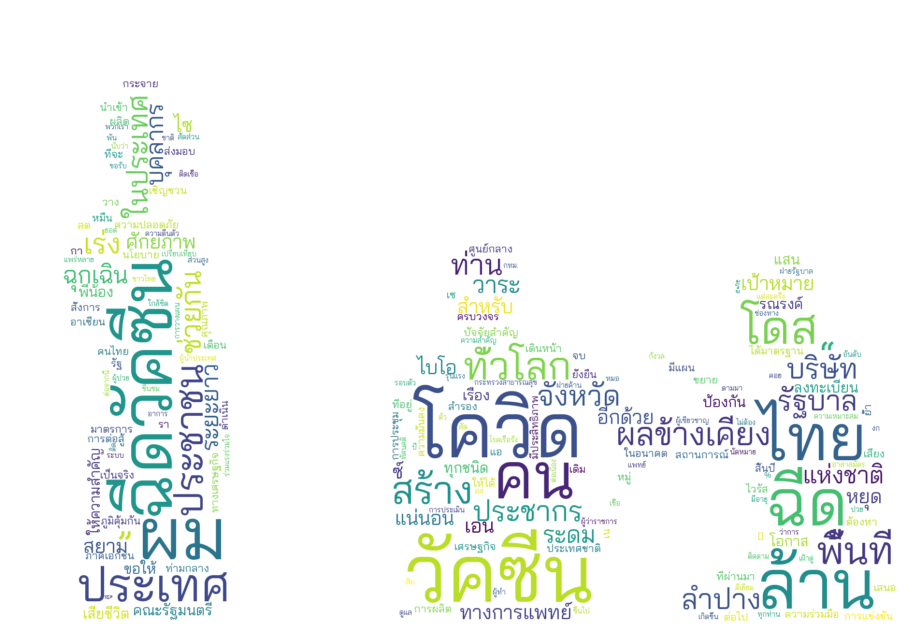

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.savefig('./images/20210512-output.png')